In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df["Class"].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64>

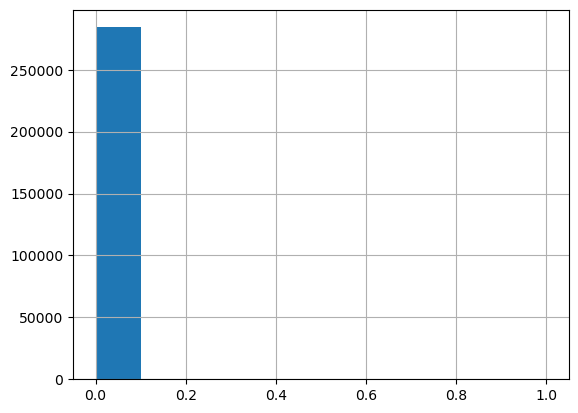

In [6]:
df.Class.hist()
plt.show()

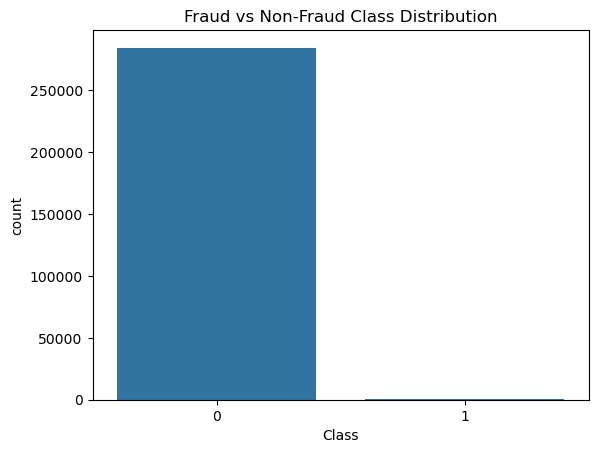

In [7]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Class Distribution")
plt.show()

In [8]:
df['Class'].value_counts(normalize = True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

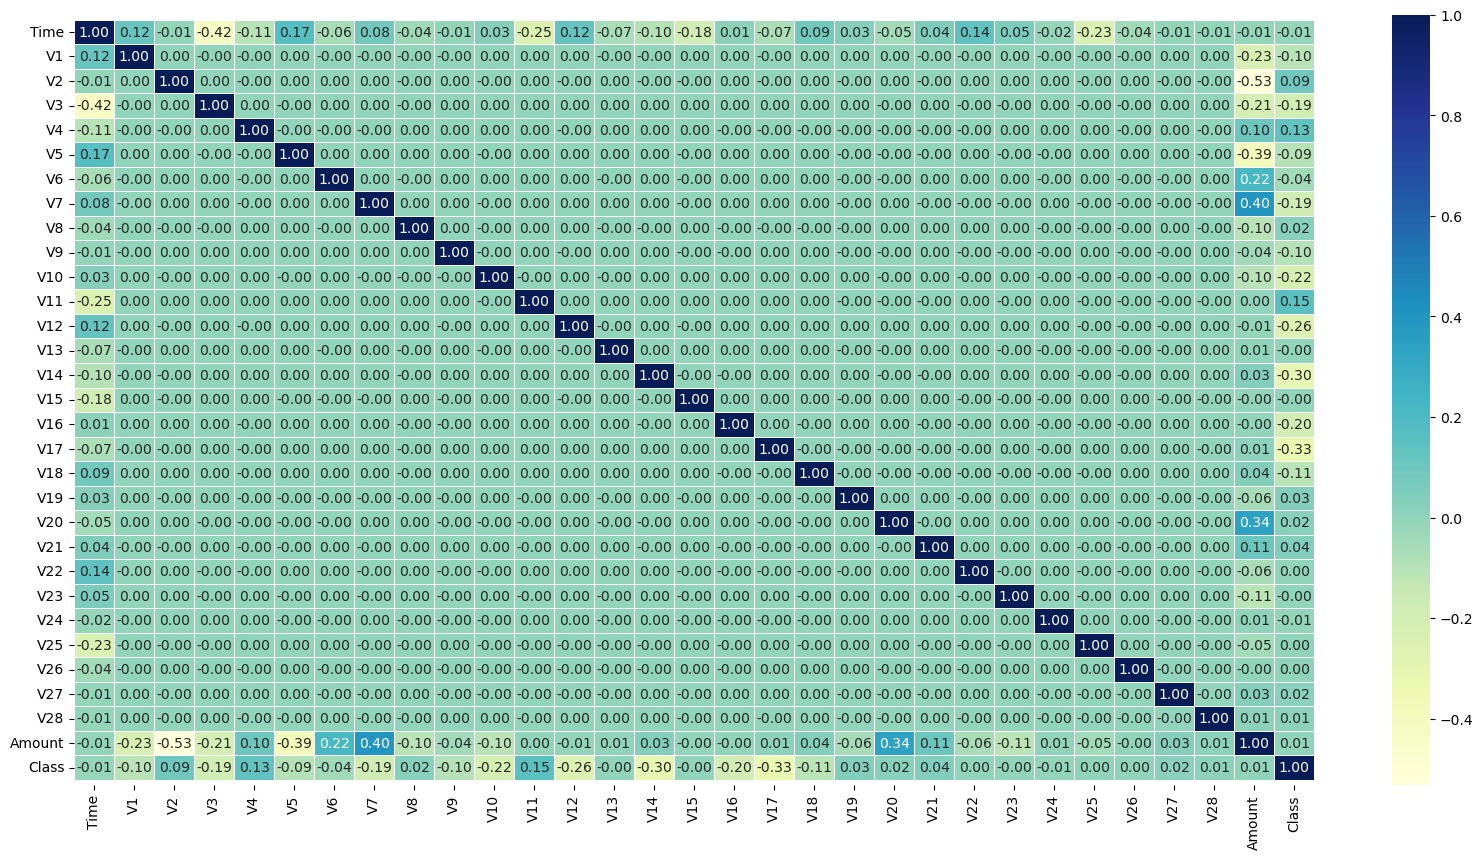

In [9]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.2, top-0.2)
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [11]:
%%time
x = df.drop("Class", axis=1)
y = df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestClassifier(n_jobs=-1,
                              max_samples=10000)
model.fit(x_train, y_train)

CPU times: user 3.87 s, sys: 216 ms, total: 4.09 s
Wall time: 680 ms


RandomForestClassifier(max_samples=10000, n_jobs=-1)

In [12]:
model.score(x_test, y_test)

0.9992977774656788

In [13]:
grid = {
    "n_estimators": np.arange(5, 1000, 100),
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": np.arange(2,10,2),
    "max_features": ["sqrt", "log2", None]
}

In [14]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [16]:
%%time
rs_model = RandomizedSearchCV(
    estimator = model,
    param_distributions=grid,
    cv=5,
    n_iter=2,
    verbose=True
)
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 1min 7s, sys: 2.58 s, total: 1min 9s
Wall time: 10.4 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_samples=10000,
                                                    n_jobs=-1),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([  5, 105, 205, 305, 405, 505, 605, 705, 805, 905])},
                   verbose=True)

In [17]:
rs_model.score(x_test, y_test)

0.9993504441557529

In [22]:
%%time
gs_model = GridSearchCV(
    estimator=model,
    param_grid=grid,
    cv=2,
    verbose=True
)
gs_model.fit(x_train, y_train)

Fitting 2 folds for each of 480 candidates, totalling 960 fits
CPU times: user 8h 45min 6s, sys: 11min 43s, total: 8h 56min 50s
Wall time: 1h 18min 4s


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_samples=10000, n_jobs=-1),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([  5, 105, 205, 305, 405, 505, 605, 705, 805, 905])},
             verbose=True)

In [23]:
gs_model.score(x_test, y_test)

0.9992451107756047